In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [2]:
import gym
from gym import spaces
import random
from collections import deque, defaultdict

In [3]:
from glob import glob

In [4]:
import pickle

In [5]:
import json

In [6]:
def categorical_to_number(data, variables):
    """
    Receives a list of variables and a dataset for replacement of categorical values by numbers.
    Outputs dictionaries with the old values and teh new ones.
    """
    
    for v in variables:
        values = list(set(data[v]))
        values = [x for x in values if pd.notna(x)]
        values.sort()
        replace = {value: idx for idx, value in enumerate(values)}
        data[v].replace(replace, inplace = True)
        v = v.replace("/","_")
        with open(f'{v}.json','w') as file:
            json.dump(replace, file, indent = 4)
    return data

In [7]:
# Load the dataset
file_path1 = glob(f"./day*.csv")
file_path2 = glob(f"./poison*.csv")

In [8]:
file_path1 = sorted(file_path1, key=lambda x: int(x[5:].split('.')[0]))

In [9]:
file_path1

['./day8.csv',
 './day9.csv',
 './day10.csv',
 './day11.csv',
 './day12.csv',
 './day13.csv',
 './day14.csv']

In [10]:
file_path2 = sorted(file_path2, key=lambda x: int(x[8:].split('.')[0]))
file_path2

['./poison8.csv',
 './poison9.csv',
 './poison10.csv',
 './poison11.csv',
 './poison12.csv',
 './poison13.csv',
 './poison14.csv']

In [11]:
data1 = [pd.read_csv(x) for x in file_path1]
data2 = [pd.read_csv(x) for x in file_path2]

In [12]:
def preprocess_data(df):
    df['Weekday/Weekend'] = df['Weekday/Weekend'].replace({"Weekday": 0, "Weekend": 1})
    df = categorical_to_number(df,['Hour'])
    # Extract state and action data
    state_data = df[['Hour', 'Weekday/Weekend','Presence Detector', 'Face Recognition', 'Weapon Recognition']].values
    actions = df['Action'].values
    
    return state_data, actions

In [13]:
# Preprocess the dataset
#state_data_N, actions_N = preprocess_data(data1)
state_data_N = []
actions_N = []
ds1 = data1.copy()
for d in ds1:
    a, b = preprocess_data(d)
    state_data_N.append(a)
    actions_N.append(b)
    

In [14]:
state_data_N

[array([[  0,   0,   0,   0,   0],
        [  1,   0,   0,   0,   0],
        [  2,   0,   0,   0,   0],
        [  3,   0,   0,   0,   0],
        [  4,   0,   0,   0,   0],
        [  5,   0,   0,   0,   0],
        [  6,   0,   0,   0,   0],
        [  7,   0,   0,   0,   0],
        [  8,   0,   0,   0,   0],
        [  9,   0,   0,   0,   0],
        [ 10,   0,   0,   0,   0],
        [ 11,   0,   0,   0,   0],
        [ 12,   0,   0,   0,   0],
        [ 13,   0,   0,   0,   0],
        [ 14,   0,   0,   0,   0],
        [ 15,   0,   0,   0,   0],
        [ 16,   0,   0,   0,   0],
        [ 17,   0,   0,   0,   0],
        [ 18,   0,   0,   0,   0],
        [ 19,   0,   0,   0,   0],
        [ 20,   0,   0,   0,   0],
        [ 21,   0,   0,   0,   0],
        [ 22,   0,   0,   0,   0],
        [ 23,   0,   0,   0,   0],
        [ 24,   0,   0,   0,   0],
        [ 25,   0,   0,   0,   0],
        [ 26,   0,   0,   0,   0],
        [ 27,   0,   0,   0,   0],
        [ 28,   0,  

In [15]:
len(state_data_N[6])

144

In [16]:
len(state_data_N)

7

In [17]:
actions_N

[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 

In [18]:
# Preprocess the dataset
#state_data_P, actions_P = preprocess_data(data2)
state_data_P = []
actions_P = []
ds2 = data2.copy()
for d in ds2:
    a, b = preprocess_data(d)
    state_data_P.append(a)
    actions_P.append(b)
    

In [19]:
state_data_P

[array([[  0,   0,   0,   0,   0],
        [  1,   0,   0,   0,   0],
        [  2,   0,   0,   0,   0],
        [  3,   0,   0,   0,   0],
        [  4,   0,   0,   0,   0],
        [  5,   0,   0,   0,   0],
        [  6,   0,   0,   0,   0],
        [  7,   0,   0,   0,   0],
        [  8,   0,   0,   0,   0],
        [  9,   0,   0,   0,   0],
        [ 10,   0,   0,   0,   0],
        [ 11,   0,   0,   0,   0],
        [ 12,   0,   0,   0,   0],
        [ 13,   0,   0,   0,   0],
        [ 14,   0,   0,   0,   0],
        [ 15,   0,   0,   0,   0],
        [ 16,   0,   0,   0,   0],
        [ 17,   0,   0,   0,   0],
        [ 18,   0,   0,   0,   0],
        [ 19,   0,   0,   0,   0],
        [ 20,   0,   0,   0,   0],
        [ 21,   0,   0,   0,   0],
        [ 22,   0,   0,   0,   0],
        [ 23,   0,   0,   0,   0],
        [ 24,   0,   0,   0,   0],
        [ 25,   0,   0,   0,   0],
        [ 26,   0,   0,   0,   0],
        [ 27,   0,   0,   0,   0],
        [ 28,   0,  

In [20]:
#np.zeros(state_data_N[0].shape[1])

In [21]:
class RealTimeEnvironment(gym.Env):
    def __init__(self, state_data_N, actions_N, state_data_P, actions_P):
        super(RealTimeEnvironment, self).__init__()
        self.state_data_N = state_data_N
        self.actions_data_N = actions_N
        self.state_data_P = state_data_P
        self.actions_data_P = actions_P
        self.current_step = 0
        self.correct = []
        self.index = 0

        # Define observation space (4 features: Timestamp, Presence Sensor, Persons Recognized, Weapon Detected)
        self.observation_space = spaces.Box(low=0, high=1, shape=(4,), dtype=np.float32)
        
        # Action space: 2 actions (0: do nothing, 2: inform owner and police)
        self.action_space = spaces.Discrete(2)
        
    def reset_N(self):
        self.current_step = 0
        if self.index < 6:
            self.index += 1
        else:
            self.index = 0
        #print(f"self.index = {self.index}")
        return self.state_data_N[self.index][self.current_step]
    
    def reset_P(self):
        self.current_step = 0
        self.current_step = 0
        if self.index < 6:
            self.index += 1
        else:
            self.index = 0
        return self.state_data_P[self.index][self.current_step]

    def step_N(self, action):
        correct_action = int(self.actions_data_N[self.index][self.current_step])
        #print(f"Action: {action} --- Gabarito: {correct_action}")
        self.correct.append(correct_action)
        #reward = 1 if action == correct_action else -1
        if action == correct_action:
            if action == 1:
                reward = 20
            else:
                reward = 1
        else:
            if correct_action == 1 and action == 0: 
                reward = -20
            else:
                reward = -1
                print(f"Action = {action} -- O correto = {correct_action}")
        
        # Move to the next step
        self.current_step += 1
        done = self.current_step >= len(self.state_data_N[self.index])
        
        # Get the next state
        if not done:
            next_state = self.state_data_N[self.index][self.current_step]
        else:
            next_state = np.zeros(self.state_data_N[self.index].shape[1])
            if self.index <= 6:
                self.index += 1
            else:
                self.index = 0
            #next_state = self.state_data_N[self.index][0]
        return next_state, reward, done, {}
    
    def step_P(self, action):
        correct_action = int(self.actions_data_P[self.index][self.current_step])
        self.correct.append(correct_action)
        
        if action == correct_action:
            if action == 1:
                reward = 20
            else:
                reward = 1
        else:
            reward = -1
        
        # Move to the next step
        self.current_step += 1
        done = self.current_step >= len(self.state_data_P[self.index])
        
        # Get the next state
        if not done: 
            next_state = self.state_data_P[self.index][self.current_step]
        else:
            next_state = np.zeros(self.state_data_N[self.index].shape[1])
            #next_state = np.zeros(self.state_data_P.shape[1])
            
        
        return next_state, reward, done, {}
    
    def render_N(self):
        print(f"Step: {self.current_step}, State: {self.state_data_N[self.current_step]}")
        
    def render_P(self):
        print(f"Step: {self.current_step}, State: {self.state_data_P[self.current_step]}")

In [22]:
# Initialize the environment
env = RealTimeEnvironment(state_data_N, actions_N, state_data_P, actions_P)

In [23]:
env.index

0

In [24]:
# Initialize Q-table using a defaultdict for easy default values
#q_table = defaultdict(lambda: [0, 0])  # Two actions, initialized to zero

In [25]:
with open("q_table_normal.pkl", "rb") as f:
    q_table = pickle.load(f)

In [26]:
# Reconvertendo para defaultdict
q_table = defaultdict(lambda: [0, 0], q_table)

In [27]:
q_table

defaultdict(<function __main__.<lambda>()>,
            {(1, 0, 0, 0, 0): [46.293260184365685, 21.9947447107481],
             (0, 0, 0, 0, 0): [46.35110164538535, 23.90403071607307],
             (2, 0, 0, 0, 0): [46.237138590083745, 25.123909641529092],
             (3, 0, 0, 0, 0): [46.17943791694044, 22.267053158047087],
             (4, 0, 0, 0, 0): [46.12161552511525, 21.880404482397616],
             (5, 0, 0, 0, 0): [46.06555174690786, 19.96532538175137],
             (6, 0, 0, 0, 0): [46.010619969712536, 21.02995721658848],
             (7, 0, 0, 0, 0): [45.95624819264886, 18.44983121829008],
             (8, 0, 0, 0, 0): [45.90204512117404, 20.176969993959062],
             (9, 0, 0, 0, 0): [45.84793747789589, 22.605141948951925],
             (10, 0, 0, 0, 0): [45.79406656427323, 23.29772009703375],
             (11, 0, 0, 0, 0): [45.740336446110824, 24.973945815459388],
             (12, 0, 0, 0, 0): [45.68588202561175, 20.4248861829697],
             (13, 0, 0, 0, 0): [45.

In [28]:
state = env.reset_N()  # Ou `env.reset_P()` dependendo do cenário
state = tuple(state)
done = False
env.index = 0
# Metrics for tracking performance
reward_history = deque(maxlen=2016)
action_accuracy = deque(maxlen=2016)

In [29]:
env.index

0

In [30]:
poison = False
avg_reward = []
suc_rate = []
epsilon = []
index = 0
episode = 0
episode_reward = 0
while True:
    
    #print(f"Episode reward : {episode_reward}")
    # Escolher a melhor ação (exploração)
    action = np.argmax(q_table[tuple(state)])
    
    # Realizar a ação no ambiente
    next_state, reward, done, _ = env.step_N(action)  # Use step_P para outro cenário
    next_state = tuple(next_state)
    
    if reward < 0:
        print(f"state = {state} -- Reward = {reward}")

    #print(f"Estado: {state}, Ação: {action}, Recompensa: {reward}")
    state = next_state
    episode_reward += reward
    #action_accuracy.append(1 if reward == 1 else 0)  # Track if action was correct
    action_accuracy.append(1 if reward > 0 else 0)  # Track if action was correct
    
    
    
    
    if index % 143 == 0 and index != 0:
        reward_history.append(episode_reward)
        average_reward = np.mean(reward_history)
        success_rate = np.mean(action_accuracy)
        avg_reward.append(average_reward)
        suc_rate.append(success_rate)
        print(f"Episode {episode}: Avg Reward = {average_reward:.2f}, Success Rate = {success_rate:.5f}")
        episode += 1
        state = env.reset_N() if poison == False else env.reset_P()
        episode_reward = 0
        
    if episode == 1000:
        break 
    
    index += 1   

state = (70, 0, 1, 0, 1) -- Reward = -20
state = (71, 0, 1, 0, 1) -- Reward = -20
state = (72, 0, 1, 0, 1) -- Reward = -20
state = (75, 0, 1, 0, 1) -- Reward = -20
state = (76, 0, 1, 0, 1) -- Reward = -20
state = (77, 0, 1, 0, 1) -- Reward = -20
Episode 0: Avg Reward = 94.00, Success Rate = 0.95833
Episode 1: Avg Reward = 118.50, Success Rate = 0.97909
state = (24, 0, 1, 0, 0) -- Reward = -20
state = (25, 0, 1, 0, 0) -- Reward = -20
state = (26, 0, 1, 0, 0) -- Reward = -20
state = (27, 0, 1, 0, 1) -- Reward = -20
state = (28, 0, 1, 0, 0) -- Reward = -20
Episode 2: Avg Reward = 167.67, Success Rate = 0.97442
state = (82, 0, 1, 0, 1) -- Reward = -20
state = (83, 0, 1, 0, 1) -- Reward = -20
state = (84, 0, 1, 0, 1) -- Reward = -20
Episode 3: Avg Reward = 174.25, Success Rate = 0.97557
Episode 4: Avg Reward = 190.80, Success Rate = 0.98045
Episode 5: Avg Reward = 274.67, Success Rate = 0.98370
state = (70, 0, 1, 0, 1) -- Reward = -20
state = (71, 0, 1, 0, 1) -- Reward = -20
state = (72, 0,

state = (70, 0, 1, 0, 1) -- Reward = -20
state = (71, 0, 1, 0, 1) -- Reward = -20
state = (72, 0, 1, 0, 1) -- Reward = -20
state = (75, 0, 1, 0, 1) -- Reward = -20
state = (76, 0, 1, 0, 1) -- Reward = -20
state = (77, 0, 1, 0, 1) -- Reward = -20
Episode 174: Avg Reward = 251.46, Success Rate = 0.98115
state = (66, 0, 1, 0, 1) -- Reward = -20
state = (67, 0, 1, 0, 1) -- Reward = -20
state = (70, 0, 1, 0, 1) -- Reward = -20
state = (71, 0, 1, 0, 1) -- Reward = -20
state = (72, 0, 1, 0, 1) -- Reward = -20
Episode 175: Avg Reward = 250.68, Success Rate = 0.98115
Episode 176: Avg Reward = 250.07, Success Rate = 0.98115
state = (24, 0, 1, 0, 0) -- Reward = -20
state = (25, 0, 1, 0, 0) -- Reward = -20
state = (26, 0, 1, 0, 0) -- Reward = -20
state = (27, 0, 1, 0, 1) -- Reward = -20
state = (28, 0, 1, 0, 0) -- Reward = -20
Episode 177: Avg Reward = 250.16, Success Rate = 0.98115
state = (82, 0, 1, 0, 1) -- Reward = -20
state = (83, 0, 1, 0, 1) -- Reward = -20
state = (84, 0, 1, 0, 1) -- Reward

Episode 688: Avg Reward = 251.21, Success Rate = 0.98115
state = (82, 0, 1, 0, 1) -- Reward = -20
state = (83, 0, 1, 0, 1) -- Reward = -20
state = (84, 0, 1, 0, 1) -- Reward = -20
Episode 689: Avg Reward = 251.12, Success Rate = 0.98115
Episode 690: Avg Reward = 251.13, Success Rate = 0.98115
Episode 691: Avg Reward = 251.77, Success Rate = 0.98115
state = (70, 0, 1, 0, 1) -- Reward = -20
state = (71, 0, 1, 0, 1) -- Reward = -20
state = (72, 0, 1, 0, 1) -- Reward = -20
state = (75, 0, 1, 0, 1) -- Reward = -20
state = (76, 0, 1, 0, 1) -- Reward = -20
state = (77, 0, 1, 0, 1) -- Reward = -20
Episode 692: Avg Reward = 251.54, Success Rate = 0.98115
state = (66, 0, 1, 0, 1) -- Reward = -20
state = (67, 0, 1, 0, 1) -- Reward = -20
state = (70, 0, 1, 0, 1) -- Reward = -20
state = (71, 0, 1, 0, 1) -- Reward = -20
state = (72, 0, 1, 0, 1) -- Reward = -20
Episode 693: Avg Reward = 251.34, Success Rate = 0.98115
Episode 694: Avg Reward = 251.19, Success Rate = 0.98115
state = (24, 0, 1, 0, 0) --

In [31]:
import matplotlib.pyplot as plt

In [32]:
episodes = [x for x in range(0,1000,20)]

In [33]:
avg = [x for x in avg_reward[::20]]

No handles with labels found to put in legend.


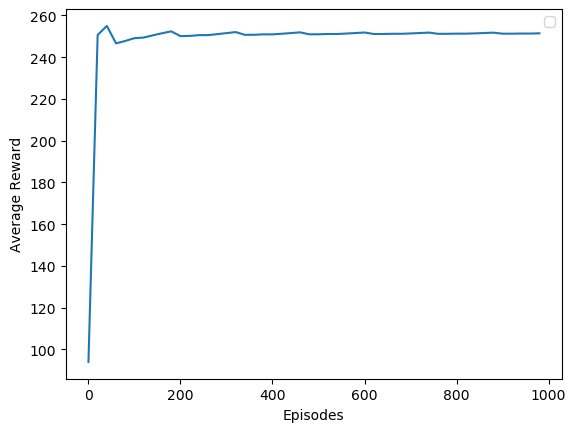

In [41]:
plt.plot(episodes,avg)
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.legend()
plt.savefig("Avg_normal_inference_2.png")

In [42]:
suc = [x for x in suc_rate[::20]]

No handles with labels found to put in legend.


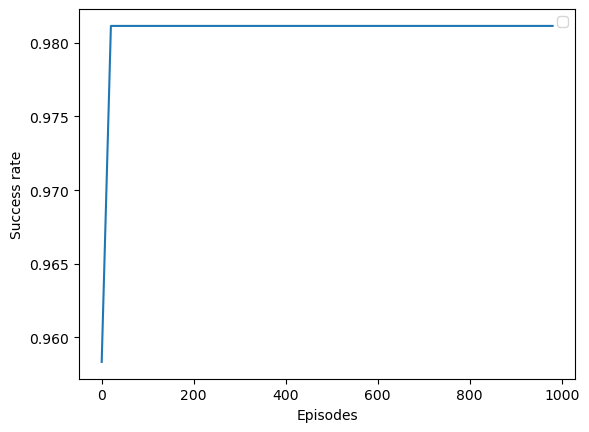

In [43]:
plt.plot(episodes,suc)
plt.xlabel('Episodes')
plt.ylabel('Success rate')
plt.legend()
plt.savefig("suc_normal_2.png")

In [37]:
len(epsilon)

0

No handles with labels found to put in legend.


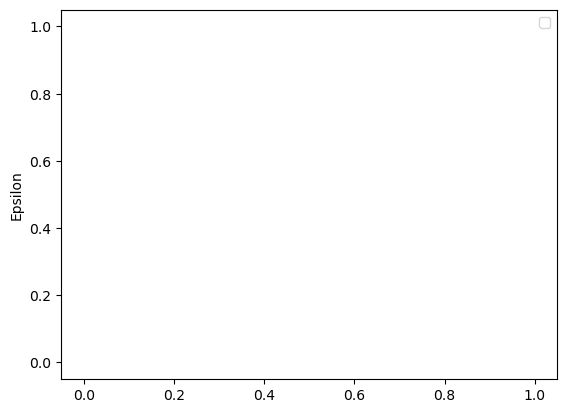

In [38]:
#plt.plot(epsilon[500:900])
#plt.xlabel('Episodes')
#plt.ylabel('Epsilon')
#plt.legend()
#plt.savefig("epsilon_normal.png")

In [39]:
epsilon[500:600]

[]

In [40]:
q_table

defaultdict(<function __main__.<lambda>()>,
            {(1, 0, 0, 0, 0): [46.293260184365685, 21.9947447107481],
             (0, 0, 0, 0, 0): [46.35110164538535, 23.90403071607307],
             (2, 0, 0, 0, 0): [46.237138590083745, 25.123909641529092],
             (3, 0, 0, 0, 0): [46.17943791694044, 22.267053158047087],
             (4, 0, 0, 0, 0): [46.12161552511525, 21.880404482397616],
             (5, 0, 0, 0, 0): [46.06555174690786, 19.96532538175137],
             (6, 0, 0, 0, 0): [46.010619969712536, 21.02995721658848],
             (7, 0, 0, 0, 0): [45.95624819264886, 18.44983121829008],
             (8, 0, 0, 0, 0): [45.90204512117404, 20.176969993959062],
             (9, 0, 0, 0, 0): [45.84793747789589, 22.605141948951925],
             (10, 0, 0, 0, 0): [45.79406656427323, 23.29772009703375],
             (11, 0, 0, 0, 0): [45.740336446110824, 24.973945815459388],
             (12, 0, 0, 0, 0): [45.68588202561175, 20.4248861829697],
             (13, 0, 0, 0, 0): [45.